# Lab 6: Support Vector Machines (SVM's)

## By Yuri Henrique Galvao - Student # 3151850

## Importing the necessary packages and modules

In [86]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import hinge_loss, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import r_regression, SelectKBest
from sklearn.preprocessing import StandardScaler

# Classification with SVM's

## Download the Iris dataset from sklearn

We will be using the ***Iris dataset*** from sklearn

In [3]:
iris_df =  load_iris(as_frame=True).frame
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
iris = load_iris()
X_original = iris.data
Y_original = iris.target
print(type(X_original))
print(type(Y_original))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
X_original.shape

(150, 4)

In [7]:
Y_original.shape

(150,)

# Prepare data for 2d experiments and plots

## Split your data into a training and test set using train_test_split from sklearn and set stratify=y

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X_original, Y_original, test_size=0.25, random_state=0, stratify=Y_original)

In [9]:
print(f'''Training examples target classes: 
{Y_train}''')

Training examples target classes: 
[1 0 0 1 2 2 1 0 1 0 0 1 0 2 0 1 1 1 1 2 2 1 0 2 2 2 2 1 1 2 2 2 1 0 0 2 2
 1 1 2 2 0 0 1 0 1 2 0 0 2 1 2 1 0 0 0 0 2 0 1 1 1 2 0 1 1 0 1 2 1 2 0 1 2
 2 1 2 0 1 0 0 2 1 2 0 0 0 0 0 1 2 2 2 0 2 0 2 0 1 1 1 1 0 2 2 0 1 1 0 2 2
 2]


In [10]:
print(f'''Testing examples target classes:
{Y_test}''')

Testing examples target classes:
[0 0 0 0 1 1 1 0 1 2 2 2 1 2 1 0 0 2 0 1 2 1 1 0 2 0 0 1 2 1 0 1 2 2 0 1 2
 2]


## You will be grabbing 2 features from the dataset (You can use any of the feature selection methods you learnt in class)
Hint: I used chi-square feature selection because it is easy, fast and gave the same results as recursive feature elimination in previous labs

### Feature selection
#### Pearsons correlation
##### Correlation matrix

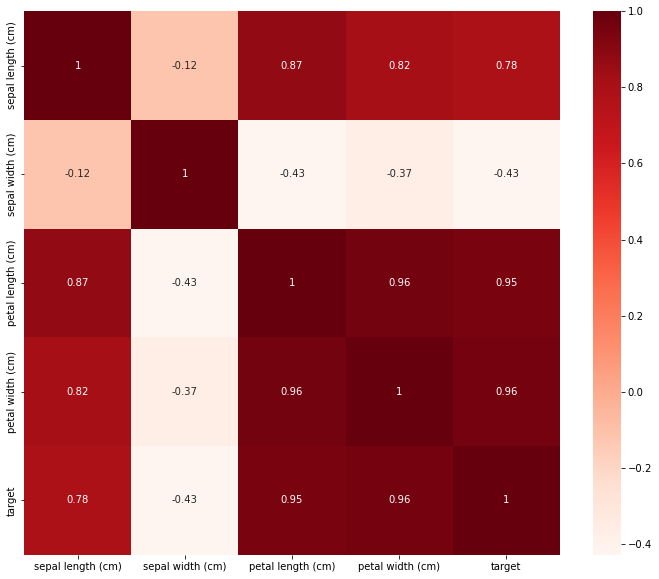

In [11]:
plt.figure(figsize=(12,10))
cor = iris_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
selector = SelectKBest(r_regression, k=2).fit(X_train, Y_train)

X_train_2d = selector.transform(X_train)
X_test_2d = selector.transform(X_test)

### Show which features were selected

In [14]:
cols = selector.get_support(indices=True)
columns_names = [iris_df.columns[n] for n in cols]

In [15]:
## Let's show the names of the selected columns
print('These are the selected columns:\n')
for name in columns_names:
    print(name)

These are the selected columns:

petal length (cm)
petal width (cm)


## Use StandardScaler to feature scale your data (If you are using chi-squared, you will want to do this after you have selected your features)

In [17]:
scaler = StandardScaler()
scaler.fit(X_train_2d)
X_train_fs_2d = scaler.transform(X_train_2d)
X_test_fs_2d = scaler.transform(X_test_2d)

In [18]:
X_train_fs_2d

array([[-0.15148942, -0.27585067],
       [-1.32740725, -1.32760471],
       [-1.32740725, -1.32760471],
       [-0.26348159, -0.27585067],
       [ 0.40847146,  0.64443411],
       [ 0.6884519 ,  0.90737262],
       [ 0.35247537,  0.1185571 ],
       [-1.38340334, -1.19613545],
       [ 0.52046363, -0.01291216],
       [-1.21541508, -0.80172769],
       [-1.43939943, -1.32760471],
       [ 0.07249493, -0.14438141],
       [-1.32740725, -1.32760471],
       [ 0.74444798,  1.5647189 ],
       [-1.21541508, -1.0646662 ],
       [-0.09549333,  0.1185571 ],
       [ 0.74444798,  0.51296486],
       [ 0.35247537,  0.25002635],
       [ 0.29647928,  0.1185571 ],
       [ 1.02442842,  1.30178039],
       [ 1.64038538,  1.30178039],
       [-0.15148942, -0.27585067],
       [-1.27141116, -1.45907396],
       [ 0.63245581,  0.77590337],
       [ 1.64038538,  1.03884188],
       [ 0.57645972,  0.77590337],
       [ 1.30440886,  1.43324964],
       [ 0.12849102, -0.01291216],
       [ 0.29647928,

# Prepare data for 3d experiments and plots

## Grab the first 3 features in your datsset and change to binary classification problem 
- You will have to make the problem a binary classifiation problem
  - This will be done by grabbing Only labels with 0 or 1. We will be completely ignoring class 2

In [25]:
iris_df_bin = iris_df[iris_df.target != 2]
iris_df_bin.target.unique()

array([0, 1])

In [28]:
X_bin_3d = iris_df_bin.iloc[:,:3]
X_bin_3d.shape

(100, 3)

In [29]:
Y_bin = iris_df_bin.target
Y_bin.shape

(100,)

## Split the data into a training and testing dataset using train_test_split from sklearn and set stratify=y (In this case remember y is your binary version of y which has only 2 labels 0 and 1)

In [31]:
X_train_bin_3d, X_test_bin_3d, Y_train_bin, Y_test_bin = train_test_split(X_bin_3d, Y_bin, test_size=0.25, random_state=0, stratify=Y_bin)

In [33]:
print(f'''Training examples target classes: 
{Y_train_bin.values}''')

Training examples target classes: 
[1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0
 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1
 0]


In [34]:
print(f'''Testing examples target classes:
{Y_test_bin.values}''')

Testing examples target classes:
[1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1]


## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="linear", C=1.0

In [37]:
# Training the model:
model = SVC(kernel='linear', C=1.0)
clf_multiclass_2d = model.fit(X_train_fs_2d, Y_train)

### Calculate the accuracy and hinge loss on the training set

In [88]:
# Predicting:
h_w_x = clf_multiclass_2d.predict(X_train_fs_2d)

In [89]:
# Calculating accuracy:
accuracy = accuracy_score(Y_train, h_w_x, normalize=True)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9553571428571429


In [90]:
# Calculating hinge loss:
hinge_loss_ = hinge_loss(Y_train, clf_multiclass_2d.decision_function(X_train_fs_2d))

print(f"Training hinge loss: {hinge_loss_}")

Training hinge loss: 0.10699609961904019


### Calculate the accuracy and hinge loss on the testing set

In [91]:
# Predicting:
h_w_x = clf_multiclass_2d.predict(X_test_fs_2d)

In [92]:
# Calculating accuracy:
accuracy = accuracy_score(Y_test, h_w_x, normalize=True)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9736842105263158


In [93]:
# Calculating hinge loss:
hinge_loss_ = hinge_loss(Y_test, clf_multiclass_2d.decision_function(X_test_fs_2d))

print(f"Training hinge loss: {hinge_loss_}")

Training hinge loss: 0.071755462790017


### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


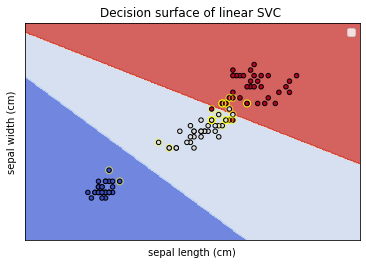

In [72]:
# Predicting and plotting on the TRAIN dataset:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf_multiclass_2d, xx, yy, **params):
    Z = clf_multiclass_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_train_fs_2d[:, 0], X_train_fs_2d[:, 1]
xx, yy = make_meshgrid(X0, X1)


plot_contours(ax, clf_multiclass_2d, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='yellow', 
            alpha=.5)
ax.set_ylabel(f'{iris_df.iloc[:, 1].name}')
ax.set_xlabel(f'{iris_df.iloc[:, 0].name}')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


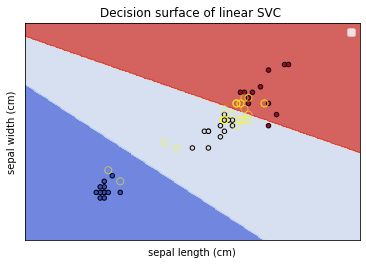

In [71]:
# Predicting and plotting on the TEST dataset:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_test_fs_2d[:, 0], X_test_fs_2d[:, 1]
xx, yy = make_meshgrid(X0, X1)


plot_contours(ax, clf_multiclass_2d, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='yellow', 
            alpha=.5)
ax.set_ylabel(f'{iris_df.iloc[:, 1].name}')
ax.set_xlabel(f'{iris_df.iloc[:, 0].name}')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

## Train, predict and plot svm on 3d prepared data with the following configuration:

- kernel="linear", C=1.0

In [94]:
# Training the model:
model = SVC(kernel='linear', C=1.0)
clf_multiclass_2d = model.fit(X_train_bin_3d, Y_train_bin)

### Plot 3D graph using binary training data with hyperplane separating the 2 points
    - Hint: You should have the plane perfectly seperating 2 classes

### Get the accuracy and hinge loss of the testing set

## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="linear", C=100000

### Calculate the accuracy and hinge loss on the training set

### Calculate the accuracy and hinge loss on the testing set

### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

## Train, predict and plot svm on 3d prepared data with the following configuration:

- kernel="linear", C=100000

### Plot 3D graph using binary training data with hyperplane separating the 2 points
    - Hint: You should have the plane perfectly seperating 2 classes

### Get the accuracy and hinge loss of the testing set

## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="linear", C=0.0001

### Calculate the accuracy and hinge loss on the training set

### Calculate the accuracy and hinge loss on the testing set

### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

## Train, predict and plot svm on 3d prepared data with the following configuration:

- kernel="linear", C=0.0001

### Plot 3D graph using binary training data with hyperplane separating the 2 points
    - Hint: You will hot have a plane perfectly seperating the data because it is underfit

### Get the accuracy and hinge loss of the testing set

## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="poly", C=1.0, degree=2, coef0=0.0, gamma="scale"

### Calculate the accuracy and hinge loss on the training set

### Calculate the accuracy and hinge loss on the testing set

### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="poly", C=1.0, degree=3, coef0=0.0, gamma="scale"

### Calculate the accuracy and hinge loss on the training set

### Calculate the accuracy and hinge loss on the testing set

### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="rbf", C=1.0, gamma="scale"

### Calculate the accuracy and hinge loss on the training set

### Calculate the accuracy and hinge loss on the testing set

### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors